In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import Data

In [80]:
imported_data = pd.read_csv('heart_2020_cleaned.csv')
imported_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Data Visualization

### Categoral Data

In [81]:
imported_data.select_dtypes(include=['O']).nunique()

HeartDisease         2
Smoking              2
AlcoholDrinking      2
Stroke               2
DiffWalking          2
Sex                  2
AgeCategory         13
Race                 6
Diabetic             4
PhysicalActivity     2
GenHealth            5
Asthma               2
KidneyDisease        2
SkinCancer           2
dtype: int64

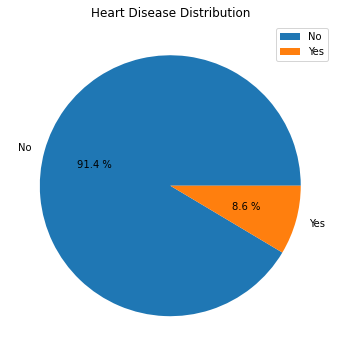

In [82]:
imported_data["HeartDisease"].value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True, figsize=(12, 6))
plt.title('Heart Disease Distribution')
plt.show()

As seen from pie chart data is extremely imbalanced

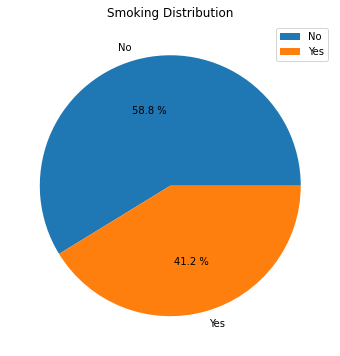

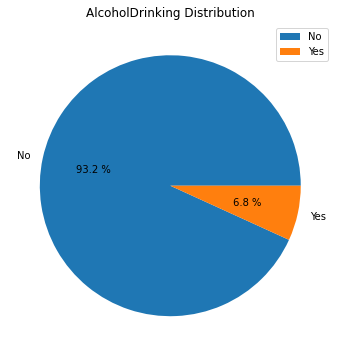

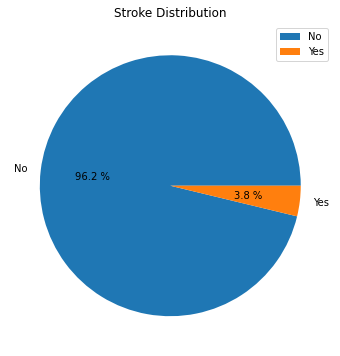

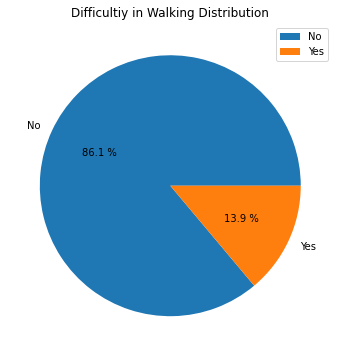

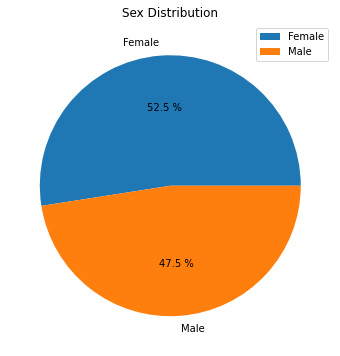

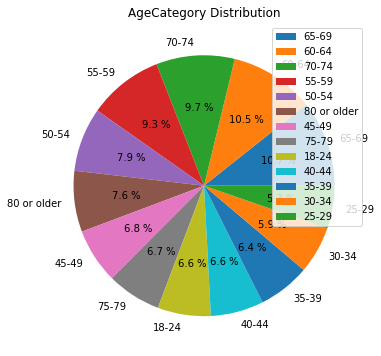

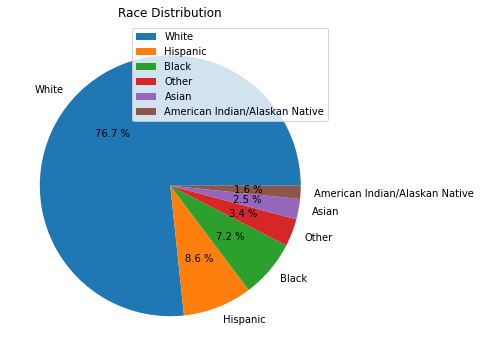

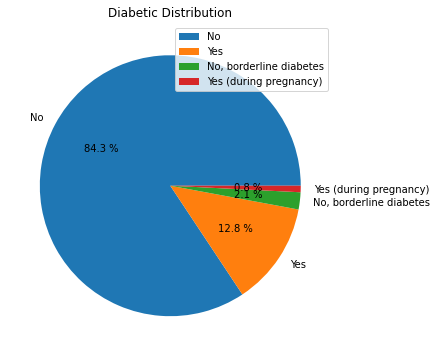

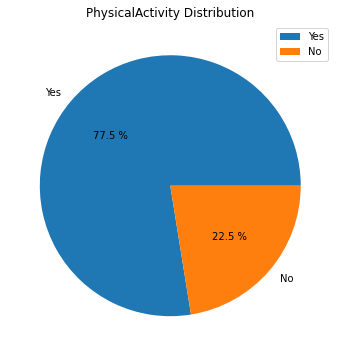

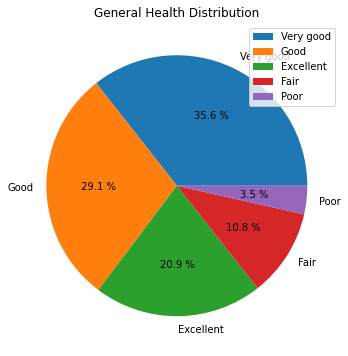

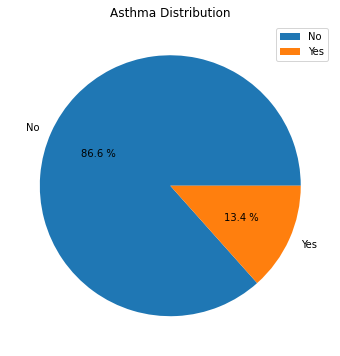

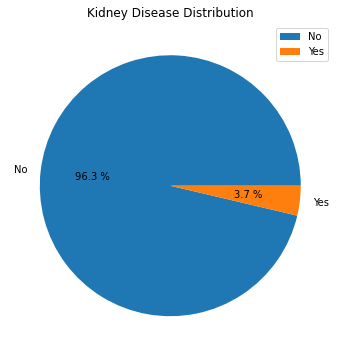

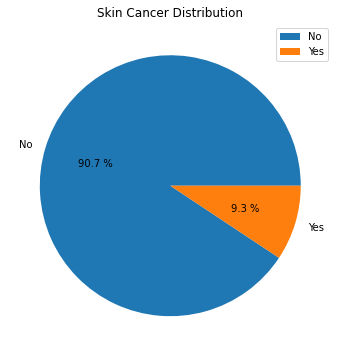

In [83]:
imported_data["Smoking"].value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True, figsize=(12, 6))
plt.title('Smoking Distribution')
plt.show()
imported_data["AlcoholDrinking"].value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True, figsize=(12, 6))
plt.title('AlcoholDrinking Distribution')
plt.show()
imported_data["Stroke"].value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True, figsize=(12, 6))
plt.title('Stroke Distribution')
plt.show()
imported_data["DiffWalking"].value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True, figsize=(12, 6))
plt.title('Difficultiy in Walking Distribution')
plt.show()
imported_data["Sex"].value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True, figsize=(12, 6))
plt.title('Sex Distribution')
plt.show()
imported_data["AgeCategory"].value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True, figsize=(12, 6))
plt.title('AgeCategory Distribution')
plt.show()
imported_data["Race"].value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True, figsize=(12, 6))
plt.title('Race Distribution')
plt.show()
imported_data["Diabetic"].value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True, figsize=(12, 6))
plt.title('Diabetic Distribution')
plt.show()
imported_data["PhysicalActivity"].value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True, figsize=(12, 6))
plt.title('PhysicalActivity Distribution')
plt.show()
imported_data["GenHealth"].value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True, figsize=(12, 6))
plt.title('General Health Distribution')
plt.show()
imported_data["Asthma"].value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True, figsize=(12, 6))
plt.title('Asthma Distribution')
plt.show()
imported_data["KidneyDisease"].value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True, figsize=(12, 6))
plt.title('Kidney Disease Distribution')
plt.show()
imported_data["SkinCancer"].value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=True, figsize=(12, 6))
plt.title('Skin Cancer Distribution')
plt.show()

### Continous Data

In [84]:
imported_data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


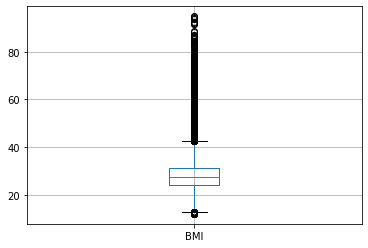

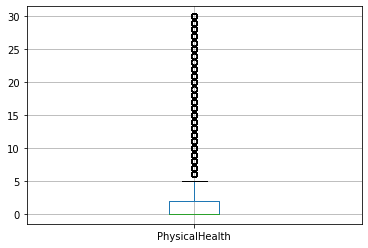

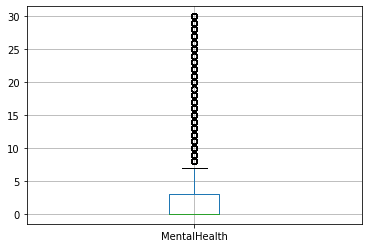

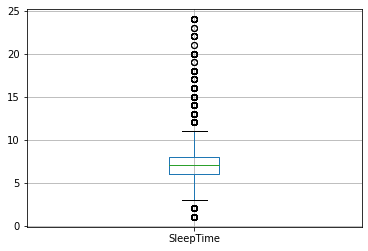

In [85]:
imported_data[["BMI"]].boxplot()
plt.show()
imported_data[["PhysicalHealth"]].boxplot()
plt.show()
imported_data[["MentalHealth"]].boxplot()
plt.show()
imported_data[["SleepTime"]].boxplot()
plt.show()

As seen from box plots there are some outliers in some columns like SleepTime as between 1st quartile and 3rd quartile most people sleep between 7-8 hours however there are outliers as some people sleep more than 20 hours

# Cleaning data

### Categoral Data

In [87]:
imported_data.select_dtypes(include=['O']).nunique()

HeartDisease         2
Smoking              2
AlcoholDrinking      2
Stroke               2
DiffWalking          2
Sex                  2
AgeCategory         13
Race                 6
Diabetic             4
PhysicalActivity     2
GenHealth            5
Asthma               2
KidneyDisease        2
SkinCancer           2
dtype: int64

We convert columns have 2 values ("Yes" , "No") or ("Male","Female") to (0,1)

In [88]:
booleanCols = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']
for col in booleanCols:
    imported_data[col] = imported_data[col].map({'Yes':1,'No':0})
imported_data['Sex'] = imported_data['Sex'].map({'Male':1,'Female':0})
imported_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,No,1,Very good,8.0,0,0,0


We convert columns have more than 2 values to integers

In [89]:
# We convert columns have more than 2 values to integers
imported_data["Race"] = pd.factorize(imported_data['Race'])[0]
imported_data["Diabetic"] = pd.factorize(imported_data['Diabetic'])[0]
imported_data["GenHealth"] = pd.factorize(imported_data['GenHealth'])[0]
# imported_data["AgeCategory"] = pd.factorize(imported_data['AgeCategory'])[0]
imported_data.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,0,0,1,0,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,0,1,1,0,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,0,0,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,0,1,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,0,1,1,0,8.0,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,0,75-79,1,1,0,1,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,70-74,0,1,1,1,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,80 or older,0,0,0,2,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,80 or older,0,2,0,1,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,65-69,0,1,1,2,10.0,0,0,0


Convert age category to be a integer column

In [90]:
imported_data.AgeCategory.unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [91]:
imported_data['AgeCategory'] = imported_data['AgeCategory'].map({'18-24':0,'25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12})
imported_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,0,0,1,0,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0,1,1,0,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,0,0,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,0,1,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0,1,1,0,8.0,0,0,0


### Visualize correlation between columns

<AxesSubplot:>

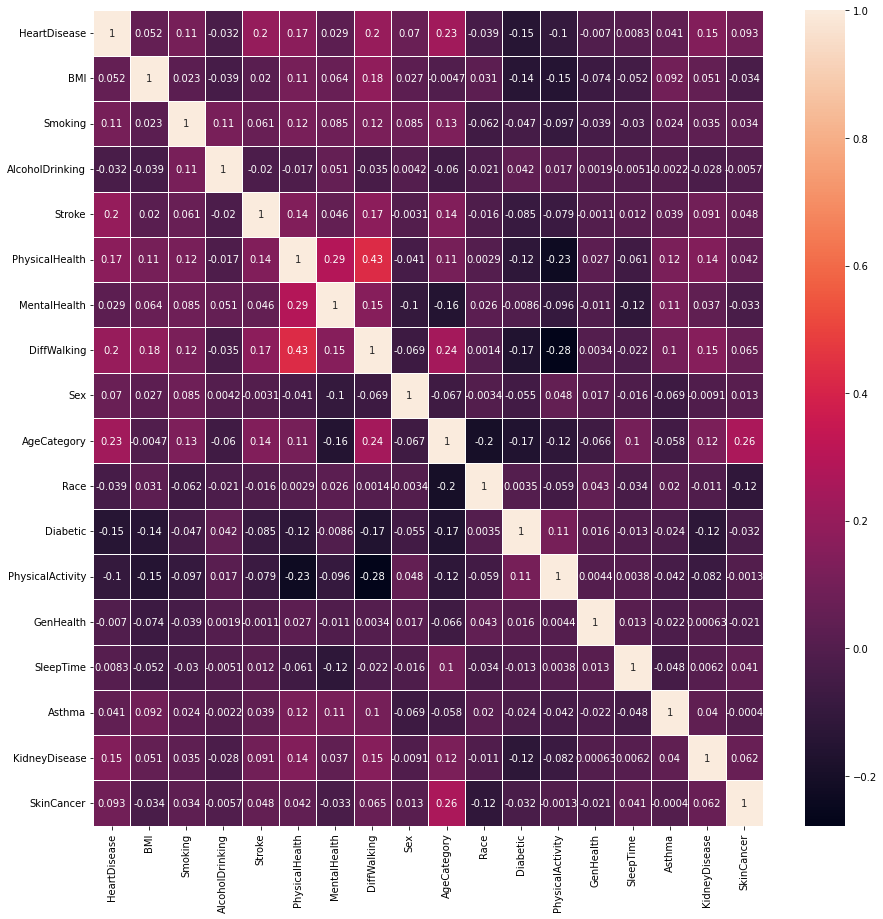

In [92]:
# calculate the correlation matrix
corr = imported_data.corr()

# plot the heatmap
plt.figure(figsize = (15,15))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, linewidths=.5, annot=True)

#### Note: some attributes doesn't have meaning in the above matrix as sex,race
#### As seen from the correlation matrix some attributes have strong positive correlation with heart disease like age (0.23), Difficulity of walking (0.2) , stroke (0.2) , kidneyDisease(0.15)

In [ ]:
# TODOS: Try clustring or assotiative rules mining , See seaborn clustermap
# TODOS: Add more bar charts with combined data as (smoking with heart disease, alcohol with heart disease, etc)
# TODOS: Improve visualization (add labels)
# TODOS: Training part